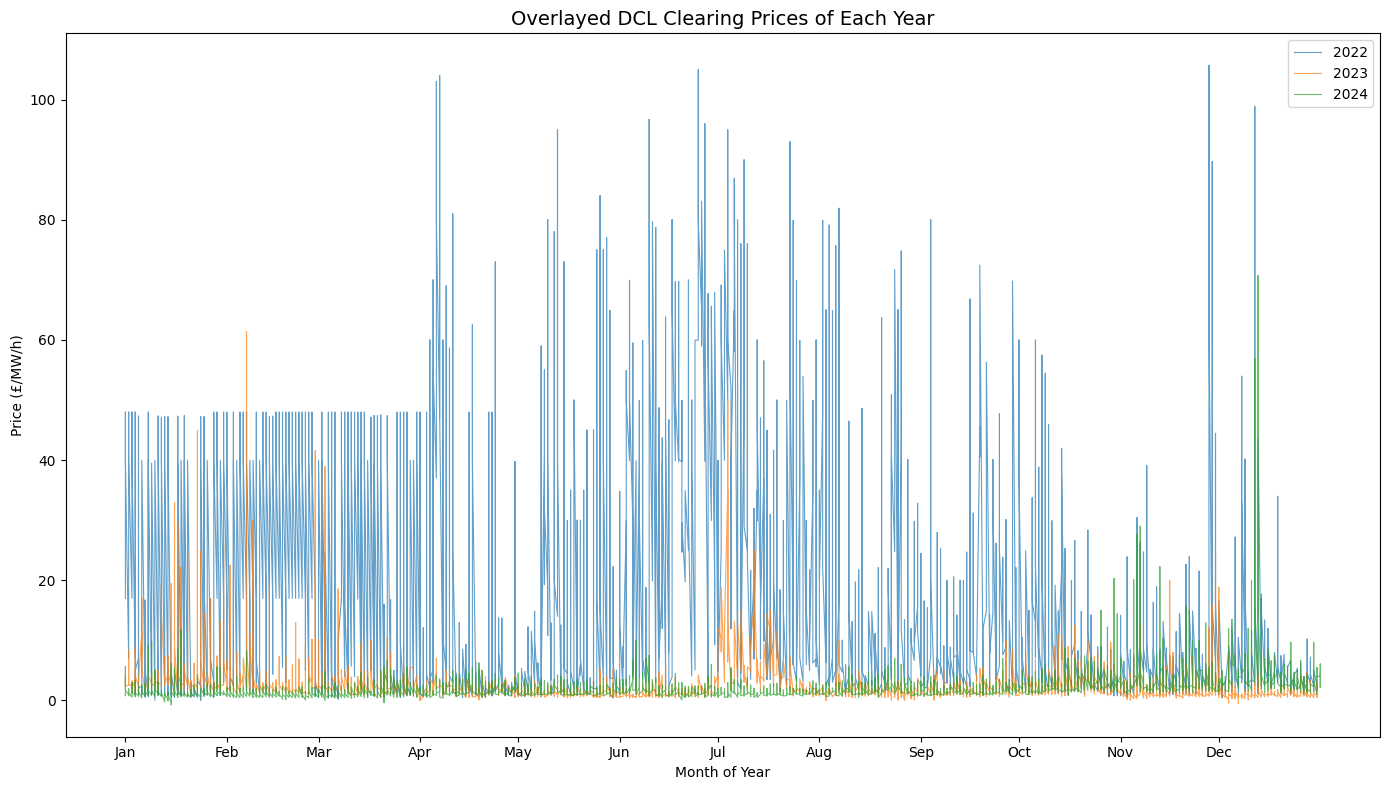

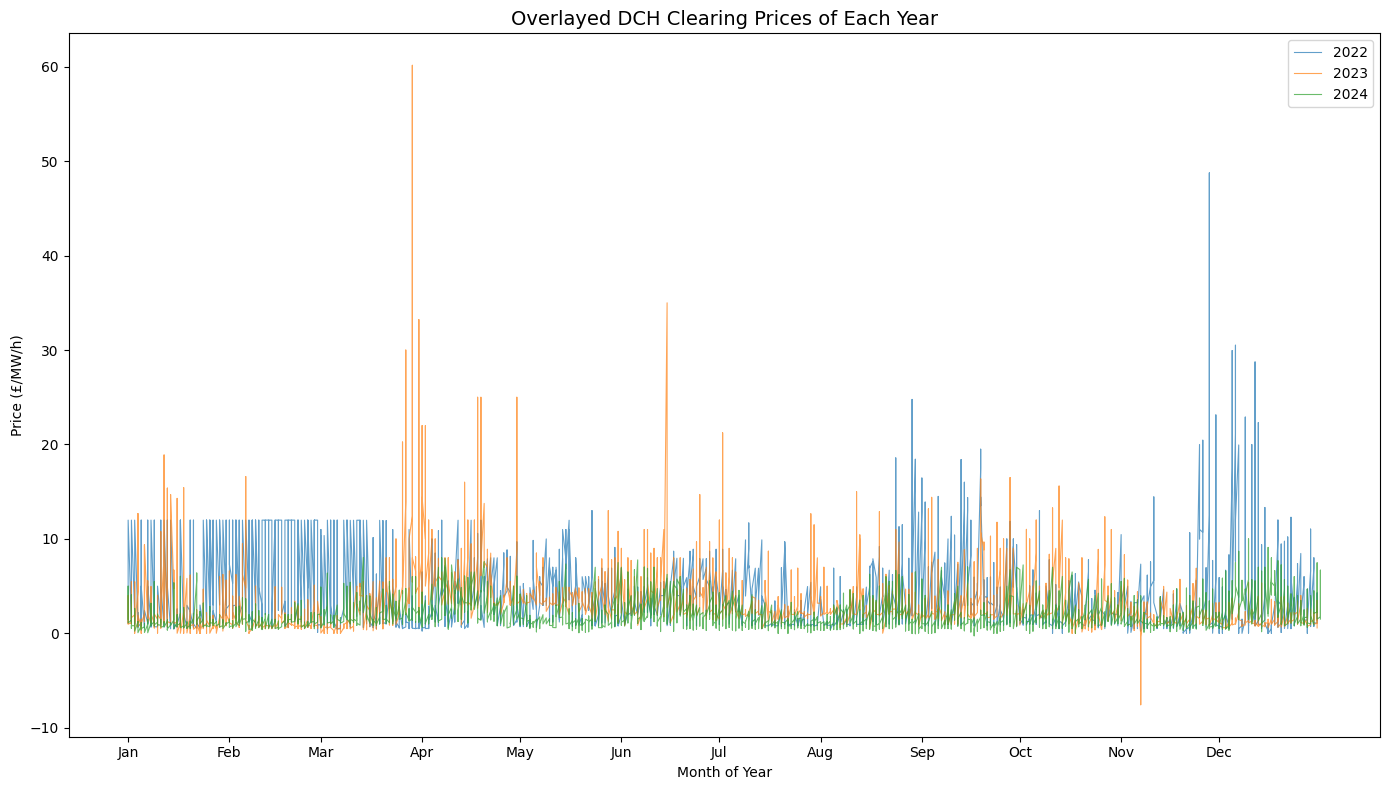

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define base path and load data from cleaned market prices folder 
base_path = '/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration'

dcl_2022 = pd.read_csv(os.path.join(base_path, 'Cleaned market prices/DC/DCL/2022 DCL Price.csv'))
dcl_2023 = pd.read_csv(os.path.join(base_path, 'Cleaned market prices/DC/DCL/2023 DCL Price.csv'))
dcl_2024 = pd.read_csv(os.path.join(base_path, 'Cleaned market prices/DC/DCL/2024 DCL Price.csv'))

dch_2022 = pd.read_csv(os.path.join(base_path, 'Cleaned market prices/DC/DCH/2022 DCH Price.csv'))
dch_2023 = pd.read_csv(os.path.join(base_path, 'Cleaned market prices/DC/DCH/2023 DCH Price.csv'))
dch_2024 = pd.read_csv(os.path.join(base_path, 'Cleaned market prices/DC/DCH/2024 DCH Price.csv'))

# Convert Date column to datetime and add month for x-axis labeling
for df, year in zip([dcl_2022, dcl_2023, dcl_2024, dch_2022, dch_2023, dch_2024], 
                    [2022, 2023, 2024, 2022, 2023, 2024]):
    df['Date'] = pd.to_datetime(df['Date'])
    df['price'] = df['Clearing Price']
    df['day_of_year'] = df['Date'].dt.dayofyear
    df['month'] = df['Date'].dt.month
    df['year'] = year

# Define colors and data
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
years = [2022, 2023, 2024]
dcl_dfs = [dcl_2022, dcl_2023, dcl_2024]
dch_dfs = [dch_2022, dch_2023, dch_2024]

# DCL Plot
plt.figure(figsize=(14, 8))
for df, year, color in zip(dcl_dfs, years, colors):
    plt.plot(df['day_of_year'], df['price'], 
             color=color, alpha=0.7, linewidth=0.8, label=f'{year}')
plt.title('Overlayed DCL Clearing Prices of Each Year', fontsize=14)
plt.xlabel('Month of Year')
plt.ylabel('Price (£/MW/h)')

# Set x-axis to show months instead of days
month_starts = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]  # Approximate day of year for each month start
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_starts, month_labels)

plt.legend()
plt.tight_layout()
plt.show()

# DCH Plot  
plt.figure(figsize=(14, 8))
for df, year, color in zip(dch_dfs, years, colors):
    plt.plot(df['day_of_year'], df['price'], 
             color=color, alpha=0.7, linewidth=0.8, label=f'{year}')
plt.title('Overlayed DCH Clearing Prices of Each Year', fontsize=14)
plt.xlabel('Month of Year')
plt.ylabel('Price (£/MW/h)')

# Set x-axis to show months instead of days
plt.xticks(month_starts, month_labels)

plt.legend()
plt.tight_layout()
plt.show()

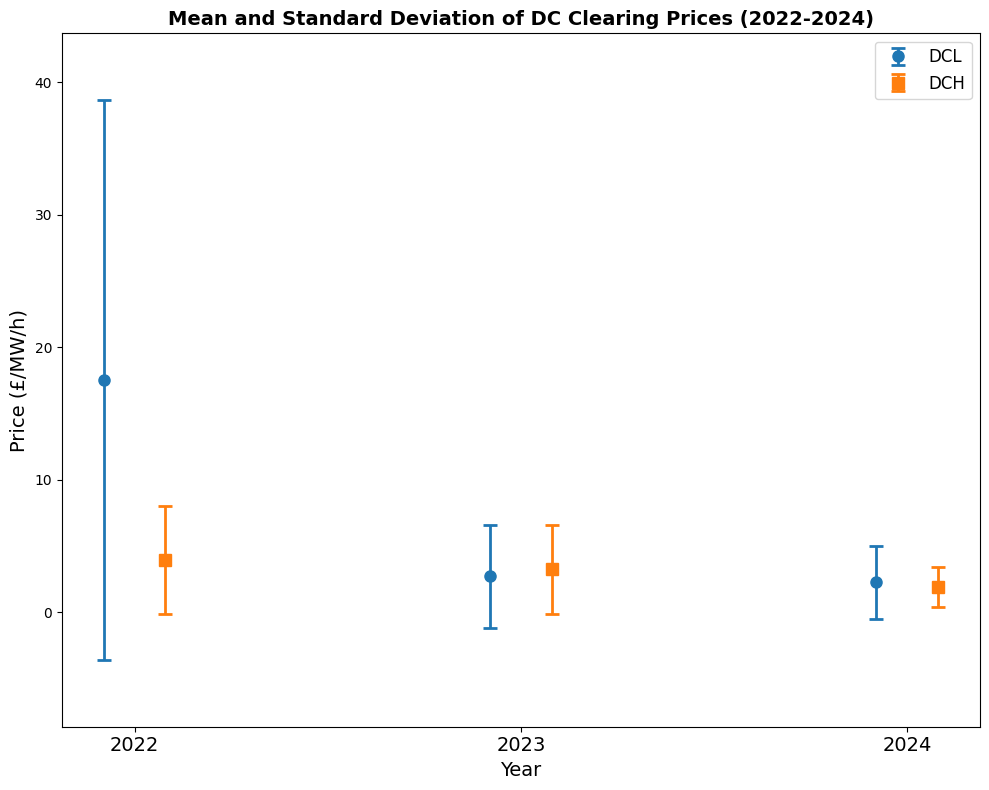

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Define base path
base_path = '/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration'

# Load data
dcl_2022 = pd.read_csv(os.path.join(base_path, 'Cleaned market prices/DC/DCL/2022 DCL Price.csv'))
dcl_2023 = pd.read_csv(os.path.join(base_path, 'Cleaned market prices/DC/DCL/2023 DCL Price.csv'))
dcl_2024 = pd.read_csv(os.path.join(base_path, 'Cleaned market prices/DC/DCL/2024 DCL Price.csv'))

dch_2022 = pd.read_csv(os.path.join(base_path, 'Cleaned market prices/DC/DCH/2022 DCH Price.csv'))
dch_2023 = pd.read_csv(os.path.join(base_path, 'Cleaned market prices/DC/DCH/2023 DCH Price.csv'))
dch_2024 = pd.read_csv(os.path.join(base_path, 'Cleaned market prices/DC/DCH/2024 DCH Price.csv'))

# Process data
for df in [dcl_2022, dcl_2023, dcl_2024, dch_2022, dch_2023, dch_2024]:
    df['price'] = df['Clearing Price']

years = [2022, 2023, 2024]
dcl_dfs = [dcl_2022, dcl_2023, dcl_2024]
dch_dfs = [dch_2022, dch_2023, dch_2024]

# Calculate statistics
dcl_means = [df['price'].mean() for df in dcl_dfs]
dcl_stds = [df['price'].std() for df in dcl_dfs]
dch_means = [df['price'].mean() for df in dch_dfs]
dch_stds = [df['price'].std() for df in dch_dfs]

# Create the plot similar to the reference
fig, ax = plt.subplots(figsize=(10, 8))

# Colors
dcl_color = '#1f77b4'  # Blue
dch_color = '#ff7f0e'  # Orange

# X positions for each year - reduced offset for closer spacing
x_dcl = np.array(years) - 0.08  # Reduced from 0.15 to 0.08
x_dch = np.array(years) + 0.08  # Reduced from 0.15 to 0.08

# Create error bars
ax.errorbar(x_dcl, dcl_means, yerr=dcl_stds, 
           fmt='o', color=dcl_color, capsize=5, capthick=2, 
           markersize=8, linewidth=2, label='DCL')

ax.errorbar(x_dch, dch_means, yerr=dch_stds, 
           fmt='s', color=dch_color, capsize=5, capthick=2, 
           markersize=8, linewidth=2, label='DCH')

# Customize the plot
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Price (£/MW/h)', fontsize=14)
ax.set_title('Mean and Standard Deviation of DC Clearing Prices (2022-2024)', fontsize=14, fontweight='bold')
ax.set_xticks(years)
ax.set_xticklabels(years)
ax.tick_params(axis='x', labelsize=14)  # Enlarge x-axis year labels
ax.legend(fontsize=12)

# Add some padding to y-axis
all_means = dcl_means + dch_means
all_stds = dcl_stds + dch_stds
y_min = min([m - s for m, s in zip(all_means, all_stds)]) - 5
y_max = max([m + s for m, s in zip(all_means, all_stds)]) + 5
ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()